In [1]:
!pip install mlxtend
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# TD / TP 1

## Frequent itemset mining

Let us consider the transaction database depicted in the following Table.

| Id  | Motif  | 
|----------|----------|
| 1  |  {a, c, d}  | 
| 2  |  {b, c, e}  | 
| 3 |  {a, b, c, e}  | 
| 4 |  {b, e}  | 
| 5 |  {a, b, c, e}  | 
| 6 |  {a, b, c, e}  | 

1. General questions independent of the minimum frequency threshold:
    1. What is the maximal number of frequent itemsets that can be extracted from this dataset?
    2. Draw the Hasse diagram of itemsets (subset relation).
    3. What is the maximal number of scans over the database with APriori algorithm ? 
2. Assuming $\sigma = 2$
    1. what are the frequent itemsets?
    2. what are the closed itemsets?
    3. what are the maximal itemsets?
2. Extract the frequent itemsets with $\sigma = 2$ with a breadth-first enumeration (generate and test strategy).
3. Compute the frequent itemsets (minsup = 2) by using a depth first strategy.

### Implementation of a frequent itemset mining algorithm

#### Breadth first search

Fulfill the following functions to implement the APriori algorithm using a breadth-first search. 
A _transaction_ of the database is represented by a set, but we suggest to represent an _itemset pattern_ by a list of items (not a set). Using set is more convenient to add and remove items from them.

In [2]:
# dataset example: list of sets
dataset = [set(['a', 'c', 'd']),
           set(['b', 'c', 'e']),
           set(['a', 'b', 'c', 'e']),
           set(['b', 'e']),
           set(['a', 'b', 'c', 'e']),
           set(['a', 'b', 'c', 'e'])]

In [7]:
def support(dataset,I):
    """Compute the support of the itemset I in the dataset D
    returns an integer

    dataset: list of sets of items
    I: list of items

    hints: use the function "issubset" on set
    """
    c=0
    for transaction in dataset:
        if set(I).issubset(transaction):
            c+=1
    return c

# test of the function
support(dataset, ['a','e'])

3

In [8]:
def candidates(F):
    """Generate candidate itemsets of size k+1 from frequent itemsets of size k
    F is a list of frequent itemsets (represented as a list) of size k.
    
    """
    C=[]
    for i in range(len(F)):
        plast = F[i][-1]
        F[i]=F[i][:-1]
        for j in range(i+1,len(F)):
            qlast = F[j][-1]
            F[j]=F[j][:-1]
            if F[i]==F[j]: #same prefix
                newis=F[i].copy() ##Warning! Copy is mandatory
                newis.append(plast)
                newis.append(qlast)
                C.append( newis )
            F[j].append(qlast)
        F[i].append(plast)
    return C

# test of the function
candidates( [ ['a', 'b', 'c'], 
            ['a', 'b', 'd'], 
            ['a', 'b', 'e'],
            ['a', 'c', 'e'],
            ['a', 'd', 'e'], 
            ['a', 'e', 'f'] ] )

[['a', 'b', 'c', 'd'], ['a', 'b', 'c', 'e'], ['a', 'b', 'd', 'e']]

In [9]:
def frequent1itemsets(dataset,sigma):
    """
    dataset: list of sets
    sigma: minimal frequency threshold
    
    """
    # find the 1-itemsets (union of all transactions)
    I=[]
    vocabulary=set()
    for transaction in dataset:
        vocabulary = vocabulary.union(transaction)
    
    for i in vocabulary:
        if support(dataset,[i])>=sigma:
            I.append( [i] )
    return I

frequent1itemsets(dataset,2)

[['c'], ['e'], ['a'], ['b']]

In [10]:
def APriori(dataset, sigma):
    """
    dataset: list of sets
    sigma: minimal frequency threshold

    Level-wise (breadth first search) algorithm for mining frequent itemsets
    """
    F=[] #frequent patterns
    # find the 1-itemsets (union of all transactions)
    Fk = frequent1itemsets(dataset,sigma)
    F=Fk.copy()
    while( len(Fk)>0 ):
        # generate candidates
        C = candidates( Fk )
        Fk=[]
        # prune unfrequent candidates
        for I in C:
            if support(dataset, I)>=sigma:
                Fk.append(I)
                F.append(I)
    return F

#test
APriori(dataset,3)

[['c'],
 ['e'],
 ['a'],
 ['b'],
 ['c', 'e'],
 ['c', 'a'],
 ['c', 'b'],
 ['e', 'a'],
 ['e', 'b'],
 ['a', 'b'],
 ['c', 'e', 'a'],
 ['c', 'e', 'b'],
 ['c', 'a', 'b'],
 ['e', 'a', 'b'],
 ['c', 'e', 'a', 'b']]

#### Depth-first search

Implement the APriori stragety (generate and test) using a depth first search :

1. identify the 1-itemsets
2. create a recursive function that test a pattern $p$, and extent it by an item (if necessary)

You will take care that your function do not explore twice the same patterns.

In [14]:
def test_and_generate(p, dataset, sigma, F1):
    """
    p: an itemset pattern
    dataset: dataset
    ...

    Recursive function
    """
    if support(dataset,p)<sigma:
        #the pattern is not frequent, stop recursion
        return []

    F=[p]
    Fextend=F1.copy()
    while len(Fextend)>0:
        I= Fextend[-1][0] #get the (unique) item of the frequent 1-itemset
        if max(p)<I:
            q = p.copy()
            q.append(I)
            Fextend=Fextend[:-1]
            F= F + test_and_generate(q, dataset, sigma, F1)
        else:
            Fextend=Fextend[:-1]
    return F

In [15]:
def APriori_rec(dataset, sigma):
    """
    dataset: list of sets
    sigma: minimal frequency threshold

    Depth first search algorithm for mining frequent itemses. 
    This function call the `test_and_generate` recursive function
    """
    F=[] #frequent patterns
    # find the 1-itemsets (union of all transactions)
    F1 = frequent1itemsets(dataset,sigma)
    for q in F1:
        F = F+ test_and_generate(q, dataset, sigma, F1.copy())
    return F

#test
APriori_rec(dataset,3)

[['c'],
 ['c', 'e'],
 ['e'],
 ['a'],
 ['a', 'b'],
 ['a', 'b', 'e'],
 ['a', 'b', 'c'],
 ['a', 'b', 'c', 'e'],
 ['a', 'e'],
 ['a', 'c'],
 ['a', 'c', 'e'],
 ['b'],
 ['b', 'e'],
 ['b', 'c'],
 ['b', 'c', 'e']]

### Comparison of algorithms on a real dataset

We use the Instacart dataset from which we extracted the data of the $\approx 10000$ first customers.  

Dataset characteristics: 
* number of sequences: 9536
* number of itemsets: 61959
* number of items: 33635

We use the library `mlxtend` that implements two frequent itemsets mining algorithms. I advice to not use your own implementation on this large dataset. In do not think that it will be as efficient.

#### Data preparation and running examples

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from time import time
import pandas as pd

In [7]:
# get the name of the product
products = pd.read_csv('./products.csv')
# load the itemsets from the preprocessed dataset
fo = open("sequences_instacart.seq", "r")
itemsets = []
for line in fo.readlines():
    elems=line[:-1].split(' ')
    itemset = set([elems[i] for i in range(2,len(elems))]) #itemset of products
    itemsets.append(itemset)

In [8]:
# transformation of the dataset for mlxtend algorithms
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
df_itemsets = pd.DataFrame(te_ary, columns=te.columns_)

In [43]:
t0=time()
patterns=apriori(df_itemsets, min_support=0.001, low_memory=True)
d=time()-t0
print(patterns)
print(d)

        support                                 itemsets
0      0.031715                                      (0)
1      0.042415                                      (1)
2      0.001275                                      (3)
3      0.001227                                      (5)
4      0.007812                                     (14)
...         ...                                      ...
34444  0.001097   (2336, 22052, 8974, 9749, 8378, 27997)
34445  0.001065   (2336, 8974, 9749, 8378, 26332, 27997)
34446  0.001065  (2336, 22052, 13517, 8974, 8378, 27997)
34447  0.001178  (2336, 13517, 8974, 8378, 26332, 27997)
34448  0.001001  (2336, 11274, 12208, 9749, 8378, 27997)

[34449 rows x 2 columns]
46.229074478149414


In [40]:
t0=time()
patterns=fpgrowth(df_itemsets, min_support=0.1)
d=time()-t0
print(patterns)
print(d)


    support itemsets
0  0.157298   (2336)
1  0.186123  (11195)
2  0.112123   (8974)
3  0.118143   (8378)
1.1792683601379395


The file `products.csv` contains the name of the product. 

1. write a small and simple function to transform an itemsets with figures into itemsets with names
2. which item is the most frequent?
3. among the patterns of length 3, is there some surprizing 

#### Comparisons of the algorithms

1. Play with the threshold to evaluate which lower value of the threshold is reasonable in time (let's say: it takes less than 30s). Which problem is encountered with APriori? (then, look at the documentation to resolve the problem)
2. Evaluate the computing time of the two implementations of the frequent itemsets mining for frequency threshold from 0.1 to the lowest possible value for each implementation (I advice to collect the results in a pandas dataframe).
3. Draw the curve of time wrt the threshold with the collected figures (you can use the `matplotlib` library to draw this curve).

In [20]:
df = pd.DataFrame(columns=['method','sigma','time','nb'])
for sigma in [0.1,0.05,0.01,0.005,0.001]:
    t0=time()
    patterns=fpgrowth(df_itemsets, min_support=sigma)
    d=time()-t0
    df=pd.concat([df,pd.DataFrame({'method':['fpgrowth'],'sigma':[sigma],'time':[d],'nb':[len(patterns)]})])
    df.append({'method':'fpgrowth','sigma':sigma,'time':d, 'nb':len(patterns)}, ignore_index=True)
    t0=time()
    patterns=apriori(df_itemsets, min_support=sigma, low_memory=True)
    d=time()-t0
    df=pd.concat([df,pd.DataFrame({'method':['apriori'],'sigma':[sigma],'time':[d],'nb':[len(patterns)]})])

/tmp/ipykernel_47350/3804032988.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'method':'fpgrowth','sigma':sigma,'time':d, 'nb':len(patterns)}, ignore_index=True)
/tmp/ipykernel_47350/3804032988.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'method':'fpgrowth','sigma':sigma,'time':d, 'nb':len(patterns)}, ignore_index=True)
/tmp/ipykernel_47350/3804032988.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'method':'fpgrowth','sigma':sigma,'time':d, 'nb':len(patterns)}, ignore_index=True)
/tmp/ipykernel_47350/3804032988.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'method':'fp

In [ ]:
productId = order_products_prior[['order_id', 'product_id']]

df = orders[["user_id","order_id", "order_number","order_dow","days_since_prior_order"]]
df = df[df["user_id"]<10000].set_index("user_id")

MostUseProduct = order_products_prior[['product_id','order_id']].groupby(by="product_id").count().sort_values(by=['order_id'], ascending=False)
l = list(MostUseProduct.index)[:300]
order_products = order_products_prior.loc[order_products_prior['product_id'].isin(l)][["order_id","product_id"]]

name = products[['product_id', 'product_name']]

<AxesSubplot: xlabel='sigma'>

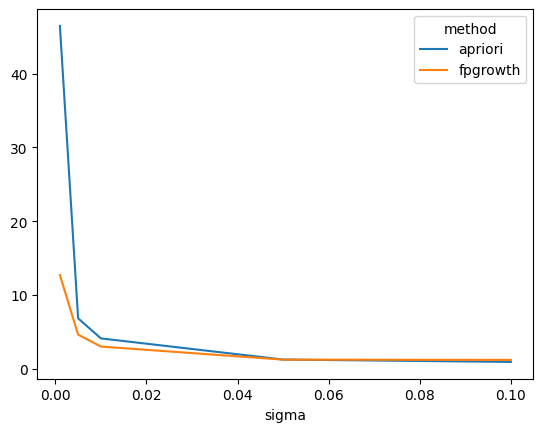

In [30]:
df.pivot(index='sigma', columns='method', values='time').reset_index().plot(x='sigma')